<a href="https://colab.research.google.com/github/kuberiitb/learnings/blob/master/dl_pytorch/02_basic_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Based on lessons in [Deep Learning with Python and Pytorch-CNN](https://www.youtube.com/watch?v=9aYuQmMJvjA&t=14s)

In [1]:
import os
import cv2
import numpy as np

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
!pip install tqdm
from tqdm import tqdm

In [4]:
torch.cuda.is_available()

True

In [5]:
device = torch.device('cuda:0')
device

device(type='cuda', index=0)

Download Dogs Vs Cats data

In [5]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2023-07-24 14:52:03--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.73.13.109, 2600:1413:b000:793::317f, 2600:1413:b000:78a::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.73.13.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   304MB/s    in 2.6s    

2023-07-24 14:52:05 (304 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [6]:
!unzip kagglecatsanddogs_5340.zip
!ls PetImages/

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  
  inflating: PetImages/Dog/5523.jpg  

In [7]:
import matplotlib.pyplot as plt

In [8]:
REBUILD_DATA = True

class DogsVsCats():

  IMAGE_SIZE = 50
  CATS = "PetImages/Cat"
  DOGS = "PetImages/Dog"
  LABELS = {CATS:0, DOGS:1}
  training_data = []
  catscount = 0
  dogscount = 0
  totalcount = 0

  def make_training_data(self):
    for label in self.LABELS.keys():
      print(label)

      for f in tqdm(os.listdir(label)):
        # self.totalcount += 1
        # if self.totalcount>10:
        #   break
        try:
          path = os.path.join(label, f)
          img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
          img = cv2.resize(img, (self.IMAGE_SIZE, self.IMAGE_SIZE))
          # plt.imshow(img) # use with break
          # plt.show()
          self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
          # print(self.CATS)
          if label==self.CATS:
            self.catscount += 1
          elif label == self.DOGS:
            self.dogscount += 1

        except Exception as e:
          pass
        # if self.catscount>100 or self.dogscount>100:
        #   break

      np.random.shuffle(self.training_data)
      np.save("training_data.npy",self.training_data)

      print("self.catscount", self.catscount)
      print("self.dogscount", self.dogscount)

if REBUILD_DATA:
  dogs_cats = DogsVsCats()
  dogs_cats.make_training_data()


PetImages/Cat


100%|██████████| 12501/12501 [00:13<00:00, 934.41it/s] 
/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


self.catscount 12476
self.dogscount 0
PetImages/Dog


100%|██████████| 12501/12501 [00:14<00:00, 855.28it/s]


self.catscount 12476
self.dogscount 12470


In [9]:
training_data = np.load("training_data.npy", allow_pickle=True)

In [10]:
print(f"there are {training_data.shape[0]} training examples")

there are 24946 training examples


label is  [1. 0.]


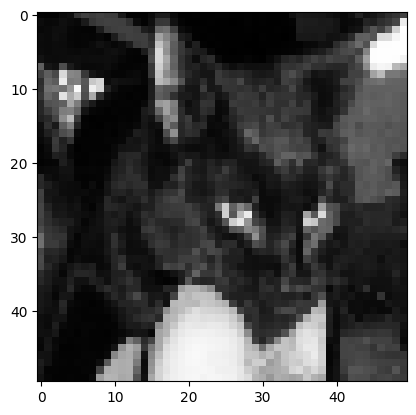

In [11]:
import matplotlib.pyplot as plt
id = 10

plt.imshow(training_data[id][0], cmap="gray")
print("label is ",training_data[id][1])
plt.show()

## Build CNN Model

In [12]:
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()

    #define layers
    n_classes = 2
    # nn.Conv2d(1, 32, 5)
    # input channel size:1
    # outout size: 32 features
    # kernel size: 5x5
    self.out_size = 128 * 2 * 2
    # self.out_size = 32 * 23 * 23

    self.conv1 = nn.Conv2d(1, 32, 5)
    self.conv2 = nn.Conv2d(32, 64, 5)
    self.conv3 = nn.Conv2d(64, 128, 5)

    self.fc1 = nn.Linear(self.out_size, 512)
    self.fc2 = nn.Linear(512, n_classes)


  def convs(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))

    return x

  def forward(self, x):
    # pass data(x) through layers
    x = self.convs(x)
    # print(x.shape)
    x = x.view(-1, self.out_size)
    # x = self.fc1(x)
    x = F.relu(self.fc1(x))

    x = self.fc2(x)
    return F.softmax(x, dim=1)

# X = torch.rand(100, 1, 50, 50)
net = ConvNet()
print(net)

# y = net(X)
# print(y)


ConvNet(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


## Creating Dataloader

In [13]:
VAL_PER = 0.1
VAL_SIZE = int(len(training_data) * VAL_PER)
print("VAL_SIZE",VAL_SIZE)

# approach 1 : using DataLoader
# trainset = torch.utils.data.DataLoader(training_data[:-VAL_SIZE], batch_size=32, shuffle=True)
# testset = torch.utils.data.DataLoader(training_data[-VAL_SIZE:], batch_size=32, shuffle=True)

# approach 1 : using manual batching
X = torch.Tensor([x[0] for x in training_data]).view(-1, 1, 50, 50)
X = X/255
y = torch.Tensor([x[1] for x in training_data])

X_train, X_test = X[:-VAL_SIZE], X[-VAL_SIZE:]
y_train, y_test = y[:-VAL_SIZE], y[-VAL_SIZE:]

VAL_SIZE 2494


<ipython-input-13-4f5945ca9d69>:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  X = torch.Tensor([x[0] for x in training_data]).view(-1, 1, 50, 50)


In [14]:
print(len(X_train), len(X_test))

len(X_train) + len(X_test) == len(X)

22452 2494


True

## Train Model

In [15]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

EPOCHS = 3
BATCH_SIZE = 10

for epoch in range(EPOCHS):
  for i in tqdm(range(0, len(X_train), BATCH_SIZE)):
    # print(i, i+BATCH_SIZE)
    batch_X = X_train[i:i+BATCH_SIZE]
    batch_y = y_train[i:i+BATCH_SIZE]
    # print(batch_X.shape)
    # print(batch_y.shape)

    net.zero_grad()
    output = net(batch_X)
    # print("output",output)
    # print("batch_y",batch_y)
    loss = loss_function(output, batch_y)
    loss.backward()
    optimizer.step()

  print(f"Epoch {epoch} loss {loss}")

100%|██████████| 2246/2246 [01:50<00:00, 20.33it/s]


Epoch 0 loss 0.25015509128570557


100%|██████████| 2246/2246 [01:50<00:00, 20.27it/s]


Epoch 1 loss 0.2500069737434387


100%|██████████| 2246/2246 [01:56<00:00, 19.30it/s]

Epoch 2 loss 0.2500062584877014


In [16]:
correct = 0
total = 0

with torch.no_grad():
  for i in tqdm(range(len(X_test))):
    y = y_test[i]
    output = net(X_test[i].view(-1,1,50,50))
    # print(output, torch.argmax(output), torch.argmax(y))
    if torch.argmax(output)==torch.argmax(y):
      correct+=1
    total+=1
print(total, correct)

100%|██████████| 2494/2494 [00:04<00:00, 516.15it/s]

2494 1240


In [17]:
print(total, correct)

print(correct/total*100)

2494 1240
49.71932638331997


## Using GPU

In [18]:
VAL_PER = 0.1
VAL_SIZE = int(len(training_data) * VAL_PER)
print("VAL_SIZE",VAL_SIZE)

# approach 2 : using manual batching
X = torch.Tensor([x[0] for x in training_data]).view(-1, 1, 50, 50)
X = X/255
y = torch.Tensor([x[1] for x in training_data])

X_train, X_test = X[:-VAL_SIZE], X[-VAL_SIZE:]
y_train, y_test = y[:-VAL_SIZE], y[-VAL_SIZE:]

VAL_SIZE 2494


In [20]:
device = torch.device('cuda:0')
device

device(type='cuda', index=0)

In [21]:
import torch.optim as optim

net = ConvNet().to(device)

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

EPOCHS = 30
BATCH_SIZE = 100

for epoch in range(EPOCHS):
  for i in tqdm(range(0, len(X_train), BATCH_SIZE)):
    # print(i, i+BATCH_SIZE)
    batch_X = X_train[i:i+BATCH_SIZE].to(device)
    batch_y = y_train[i:i+BATCH_SIZE].to(device)
    # print(batch_X.shape)
    # print(batch_y.shape)
    # try:
    net.zero_grad()
    output = net(batch_X).to(device)
    # print(output, batch_y)
    loss = loss_function(output, batch_y)
    loss.backward()
    optimizer.step()
    # break
    # except:
    #   pass

  print(f"Epochs {epoch} loss {loss}")

100%|██████████| 225/225 [00:10<00:00, 22.39it/s] 


Epochs 0 loss 0.21941770613193512


100%|██████████| 225/225 [00:01<00:00, 138.33it/s]


Epochs 1 loss 0.19056253135204315


100%|██████████| 225/225 [00:01<00:00, 138.71it/s]


Epochs 2 loss 0.15108206868171692


100%|██████████| 225/225 [00:01<00:00, 136.73it/s]


Epochs 3 loss 0.14163653552532196


100%|██████████| 225/225 [00:01<00:00, 137.12it/s]


Epochs 4 loss 0.12117145955562592


100%|██████████| 225/225 [00:01<00:00, 138.00it/s]


Epochs 5 loss 0.07550375908613205


100%|██████████| 225/225 [00:01<00:00, 137.51it/s]


Epochs 6 loss 0.09165535122156143


100%|██████████| 225/225 [00:01<00:00, 138.13it/s]


Epochs 7 loss 0.07007693499326706


100%|██████████| 225/225 [00:01<00:00, 137.92it/s]


Epochs 8 loss 0.06486290693283081


100%|██████████| 225/225 [00:01<00:00, 137.84it/s]


Epochs 9 loss 0.03110276162624359


100%|██████████| 225/225 [00:01<00:00, 136.15it/s]


Epochs 10 loss 0.028712397441267967


100%|██████████| 225/225 [00:01<00:00, 135.28it/s]


Epochs 11 loss 0.018734844401478767


100%|██████████| 225/225 [00:01<00:00, 137.27it/s]


Epochs 12 loss 0.01771722361445427


100%|██████████| 225/225 [00:01<00:00, 137.36it/s]


Epochs 13 loss 0.05356232076883316


100%|██████████| 225/225 [00:01<00:00, 137.25it/s]


Epochs 14 loss 0.03633418306708336


100%|██████████| 225/225 [00:01<00:00, 137.96it/s]


Epochs 15 loss 0.015590447932481766


100%|██████████| 225/225 [00:01<00:00, 137.22it/s]


Epochs 16 loss 0.008934183046221733


100%|██████████| 225/225 [00:01<00:00, 135.83it/s]


Epochs 17 loss 0.005179461091756821


100%|██████████| 225/225 [00:01<00:00, 133.75it/s]


Epochs 18 loss 0.010006718337535858


100%|██████████| 225/225 [00:01<00:00, 133.00it/s]


Epochs 19 loss 0.0012143366038799286


100%|██████████| 225/225 [00:01<00:00, 136.56it/s]


Epochs 20 loss 0.021811580285429955


100%|██████████| 225/225 [00:01<00:00, 137.12it/s]


Epochs 21 loss 0.006203050259500742


100%|██████████| 225/225 [00:01<00:00, 136.93it/s]


Epochs 22 loss 0.05391198769211769


100%|██████████| 225/225 [00:01<00:00, 137.18it/s]


Epochs 23 loss 8.12803627923131e-05


100%|██████████| 225/225 [00:01<00:00, 137.00it/s]


Epochs 24 loss 0.016983840614557266


100%|██████████| 225/225 [00:01<00:00, 135.84it/s]


Epochs 25 loss 0.02018916979432106


100%|██████████| 225/225 [00:01<00:00, 135.62it/s]


Epochs 26 loss 6.927546201040968e-05


100%|██████████| 225/225 [00:01<00:00, 137.10it/s]


Epochs 27 loss 0.0002093072544084862


100%|██████████| 225/225 [00:01<00:00, 136.99it/s]


Epochs 28 loss 8.705975051270798e-05


100%|██████████| 225/225 [00:01<00:00, 136.52it/s]

Epochs 29 loss 0.018772194162011147


In [22]:
correct = 0
total = 0

with torch.no_grad():
  for i in tqdm(range(len(X_train))):
    y = y_train[i].to(device)
    output = net(X_train[i].to(device))
    # print(output, torch.argmax(output), torch.argmax(y))
    if torch.argmax(output)==torch.argmax(y):
      correct+=1
    total+=1
print(total, correct)

print("Train accuracy",correct/total*100)

100%|██████████| 22452/22452 [00:14<00:00, 1577.23it/s]

22452 21859
Train accuracy 97.35880990557634


In [23]:
correct = 0
total = 0

with torch.no_grad():
  for i in tqdm(range(len(X_test))):
    y = y_test[i].to(device)
    output = net(X_test[i].to(device))
    # print(output, torch.argmax(output), torch.argmax(y))
    if torch.argmax(output)==torch.argmax(y):
      correct+=1
    total+=1
print(total, correct)

print("Test accuracy",correct/total*100)

100%|██████████| 2494/2494 [00:01<00:00, 1440.76it/s]

2494 1887
Test accuracy 75.66158781074579


Train accuracy is 97% and test accuracy is 75%.

It means this model is overfitting.

We should use some methods like dropout and early stopping to contain the error

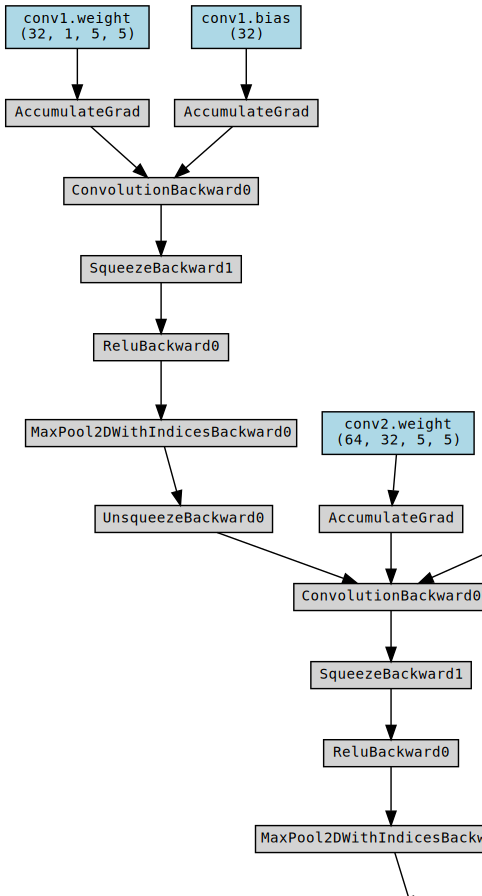

In [25]:
!pip install torchviz
from torchviz import make_dot
y = net(X_test[0].to(device))
make_dot(y, params=dict(net.named_parameters()))
# ,  show_attrs=False, show_saved=False)
